In [3]:
!pip install matplotlib

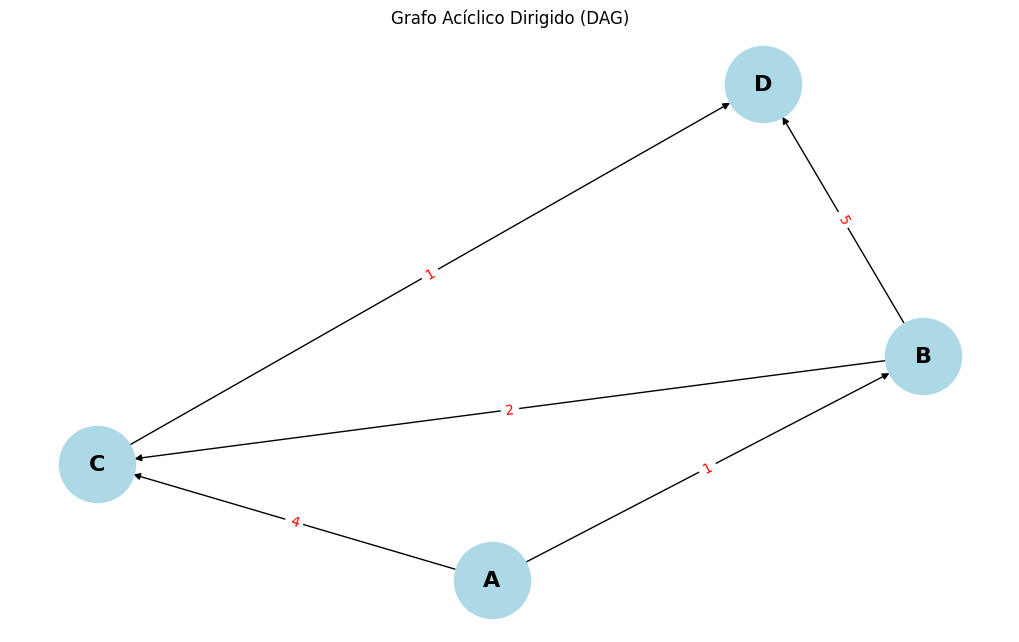

{'A': 0, 'B': 1, 'C': 3, 'D': 4}


In [6]:
import matplotlib.pyplot as plt
import networkx as nx

def topological_sort(graph):
    from collections import deque

    in_degree = {v: 0 for v in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1

    queue = deque([v for v in in_degree if in_degree[v] == 0])
    order = []

    while queue:
        u = queue.popleft()
        order.append(u)
        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)

    return order

def shortest_path_dag(graph, start):
    order = topological_sort(graph)
    dist = {v: float("inf") for v in graph}
    dist[start] = 0

    for u in order:
        for v in graph[u]:
            if dist[v] > dist[u] + graph[u][v]:
                dist[v] = dist[u] + graph[u][v]

    return dist

start_vertex = "A"
graph = {
    "A": {"B": 1, "C": 4},
    "B": {"C": 2, "D": 5},
    "C": {"D": 1},
    "D": {}
}

# Cria um grafo dirigido usando NetworkX
G = nx.DiGraph()

# Adiciona nós e arestas
for u in graph:
    for v in graph[u]:
        G.add_edge(u, v, weight=graph[u][v])

# Posicionamento dos nós usando layout de grafos
pos = nx.spring_layout(G, seed=42)

# Desenha o grafo
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=16, font_weight='bold', arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Grafo Acíclico Dirigido (DAG)')
plt.show()

result = shortest_path_dag(graph, start_vertex)

print(result)
